# **Whatsapp Chat Analyzer**

Whatsapp chat analyser is a chat analyser program where in i have analysed a group chat, consisting of a class group, where we have finally plotted out the sentiment analysis of a professor and various other exploaration have been performed.


---

The Project has three major sections:

*   Data Collection
*   Data Preparation
*   Data Exploration



**Data Collection**

The whatsapp group we want to analyze and used the “Export Chat” functionality to send the entire conversation in text format to our email ID in text format and then using the text as the base data

In [1]:
#importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#defination of function to read the text file
def read_file(filename):
    x = open(filename,'r',encoding='utf-8')
    y = x.read()
    content = y.splitlines()
    return content

In [5]:
from google.colab import files
uploaded = files.upload()

Saving WhatsApp Chat with Global IT - Batch 24.txt to WhatsApp Chat with Global IT - Batch 24.txt


In [6]:
chat = read_file("WhatsApp Chat with Global IT - Batch 24.txt")
print("The total length of the document is : ",len(chat))

The total length of the document is :  996


Performing Cleaning of the data, by changing the date time format

In [9]:
import datetime
# Remove elements that are not date

for i in range(len(chat)):
    try:
        datetime.datetime.strptime(chat[i].split(',')[0], '%d/%m/%Y') #Converts string date into a date object
    except ValueError: #Returns an error if the string is not a datetime object
        chat[i-1] = chat[i-1] + ' ' + chat[i] #Appends the next line to the previous line
        chat[i] = "NA" #Replace the unwanted text element with 'NA'

#Handle more than double-line texting
for i in range(len(chat)):
    if chat[i].split(' ')[0] == 'NA':
        chat[i] = 'NA'
    
while True:
    try:
        chat.remove("NA")
    except ValueError:
        break
        
len(chat) 

609

In [10]:
date = []
time = []
name = []
message = []
for i in range(len(chat)):
    try:
        date.append(chat[i].split(',')[0])
        time.append(chat[i].split(',')[1].split('-')[0])
        name.append(chat[i].split(',')[1].split('-')[1].split(":")[0])
        message.append(chat[i].split(',')[1].split('-')[1].split(":")[1])
    except:
        date.append('NA')
        time.append('NA')
        name.append('NA')
        message.append("Na")

#changing the text formatted data into data frame 
df = pd.DataFrame(list(zip(date, time, name, message)), columns = ['Date', 'Time', 'Name', 'Content'])

In [11]:
#Costum created data frame
df['Content'] = df['Content'].apply(lambda x:x.strip())
df['Name'] = df['Name'].apply(lambda x:x.strip())
df.head(3)

,Date,Time,Name,Content
0,18/03/2020,19:49,Messages to this group are now secured with end,Na
1,NA,NA,NA,Na
2,18/03/2020,19:14,"+91 75830 30062 created group ""Global IT",Na


In [41]:
df['Name'] = df['Name'].apply(lambda x:x.replace('9','#'))

In [42]:
df['Name'][607]

'+#1 #3261 3#660'

In [43]:
#Top 20 people with highest number of messages
df['Name'].value_counts()[:27]

Sita LnD           283
+#1 75830 30062     53
Nibedita HR         44
+#1 #4411 563##     23
NA                  22
Shuvojit Biswas     22
+#1 #3261 3#660     21
+#1 72083 646#8     18
+#1 #0070 34214     14
Rohit CGI           13
Ravi CGI            11
+#1 #8331 7115#      8
+#1 70132 67433      6
Shubh CR CGI         6
Runa Ghosh CGI       6
Suchismita CGI       5
+#1 72860 001#4      4
+#1 ##725 62611      3
+#1 70221 75666      3
Mansoor CGI          3
+#1 7036# 24655      2
+#1 #1608 86755      2
+#1 82240 0554#      2
+#1 ##872 30678      2
+#1 #5026 5#058      2
+#1 77387 78178      2
+#1 #448# 14158      2
Name: Name, dtype: int64

Plot of the data

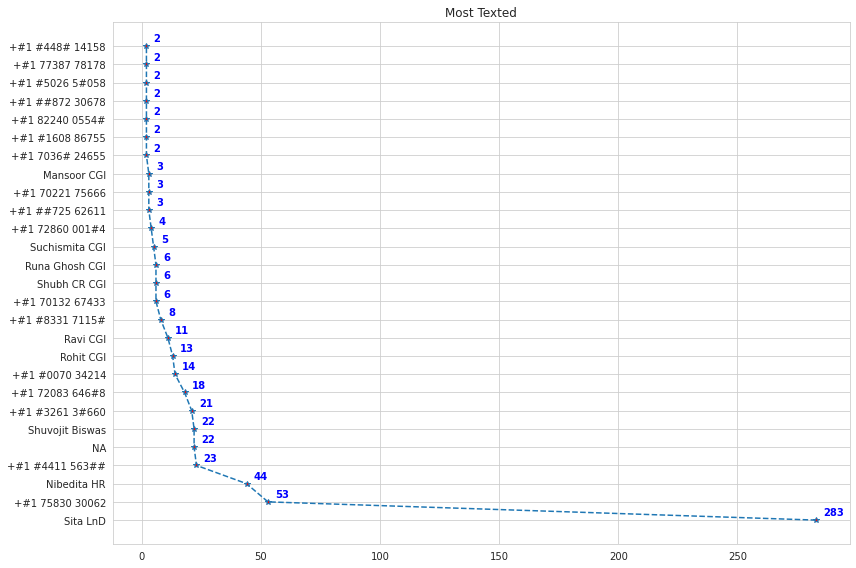

In [44]:
vals = df['Name'].value_counts()[:27]
X = vals.values
y = vals.index
plt.figure(figsize=(12,8))
plt.plot(X,y,marker='*',linestyle='--',markerfacecolor='red')
for i, v in enumerate(X):
    plt.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.title('Most Texted')
plt.tight_layout()

Maximum no. of media files shared by individuals

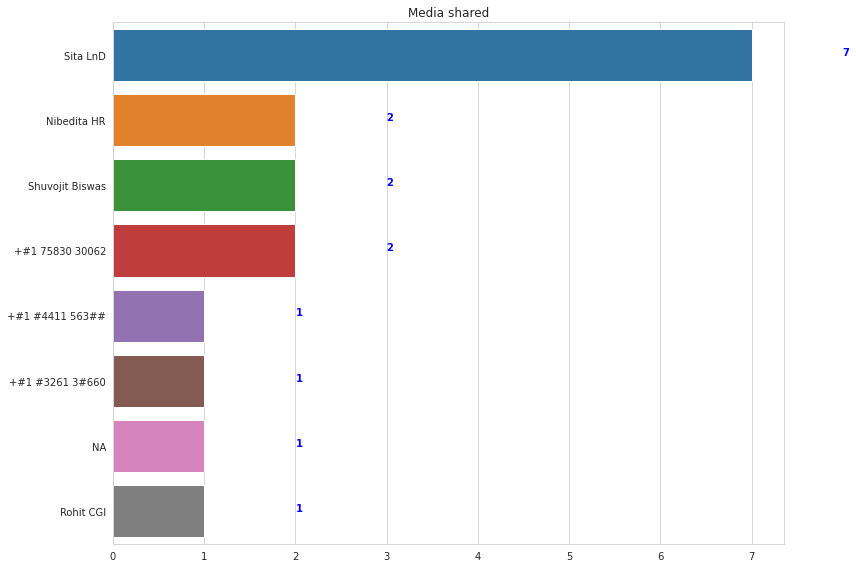

In [45]:
plt.figure(figsize=(12,8))
vals = df[df['Content']== '<Media omitted>']['Name'].value_counts()[:27]
y = vals.index
X = vals.values
sns.barplot(X,y)
for i, v in enumerate(X):
    plt.text(v+1, i , str(v), color='blue', fontweight='bold')
plt.title('Media shared')
plt.tight_layout()

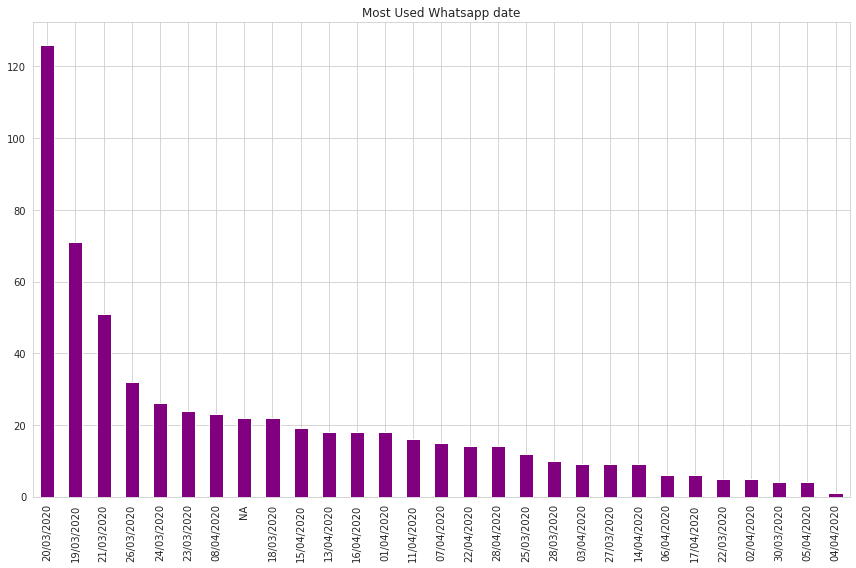

In [46]:
#date whatsapp was most used
plt.figure(figsize=(12,8))
df['Date'].value_counts().plot.bar(color='purple')
plt.title('Most Used Whatsapp date')
plt.tight_layout()


In [48]:
df['Hour'] = df['Time'].apply(lambda x:x.split(':')[0])

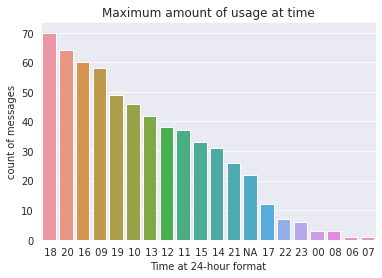

In [56]:
X = df['Hour'].value_counts().index
y = df['Hour'].value_counts().values
plt.xlabel('Time at 24-hour format')
plt.ylabel('count of messages')
plt.title('Maximum amount of usage at time')
sns.barplot(X,y)

Performing Sentiment Analysis

In [58]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [59]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
polarity=[]
for sentence in df['Content'].values:
    v = list(sid.polarity_scores(sentence).values())
    k = list(sid.polarity_scores(sentence).keys())
    polarity.append(k[v.index(max(v))])
df['POLARITY'] = polarity

In [60]:
df['POLARITY'].value_counts()

neu         370
pos         224
compound     11
neg           4
Name: POLARITY, dtype: int64

The Above explaination states that there are:


*   370 - Neutral toned message
*   274 - Positive toned message
*   11 - Compound toned message
*   4 - Negative toned message




For professor the sentiment analysis is plotted with date and time, which states her sentiments at a particular date and time 

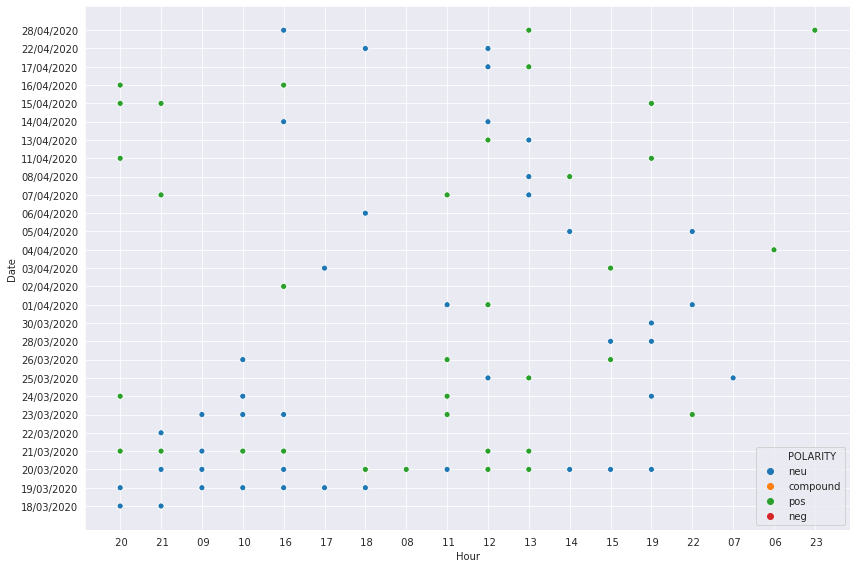

In [61]:
Name = 'Sita LnD' 
X = df[df['Name'] == Name]['Date']
y = df[df['Name'] == Name]['Hour']
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.scatterplot(y,X,hue=df['POLARITY'])
plt.legend()
plt.tight_layout()